In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

test_ids = test_data['id']


/tmp/ipykernel_505678/3249259800.py:1: DtypeWarning: Columns (0,21,24,29) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('data/train.csv')


In [4]:
train_data.isnull().sum()

id                                                   0
listing_url                                          0
scrape_id                                            1
last_scraped                                         0
name                                              1120
summary                                          29650
space                                           232272
description                                      13524
experiences_offered                                  0
neighborhood_overview                           271159
minimum_minimum_nights                          136970
maximum_minimum_nights                          136970
minimum_maximum_nights                          136970
maximum_maximum_nights                          136970
minimum_nights_avg_ntm                          136970
maximum_nights_avg_ntm                          136970
number_of_reviews_ltm                           136970
calculated_host_listings_count_entire_homes     136970
calculated

In [5]:
train_data = train_data.dropna()
test_data = test_data.dropna()

In [6]:
train_data.shape

(220522, 37)

In [7]:
train_data.isnull().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
last_scraped                                    0
name                                            0
summary                                         0
space                                           0
description                                     0
experiences_offered                             0
neighborhood_overview                           0
minimum_minimum_nights                          0
maximum_minimum_nights                          0
minimum_maximum_nights                          0
maximum_maximum_nights                          0
minimum_nights_avg_ntm                          0
maximum_nights_avg_ntm                          0
number_of_reviews_ltm                           0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0


In [8]:
train_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_is_superhost',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'instant_bookable', 'amenities', 'property_type',
       'room_type', 'cancellation_policy', 'price'],
      dtype='object')

In [9]:
train_data.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview'], axis=1, inplace=True)
test_data.drop(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview'], axis=1, inplace=True)

In [10]:
train_data.columns

Index(['id', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_is_superhost',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'instant_bookable', 'amenities', 'property_type',
       'room_type', 'cancellation_policy', 'price'],
      dtype='object')

Fazer one hot encoding

In [11]:
train_data.tail(3)

,id,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,...,beds,extra_people,minimum_nights,number_of_reviews,instant_bookable,amenities,property_type,room_type,cancellation_policy,price
588084,15043936,3.0,3.0,12.0,12.0,3.0,12.0,8.0,1.0,1.0,...,1.0,$25.00,3,8.0,f,"{TV,Wifi,Kitchen,Elevator,""Safety card"",Essent...",Apartment,Private room,flexible,$131.00
588085,7347259,4.0,4.0,1125.0,1125.0,4.0,1125.0,6.0,1.0,0.0,...,2.0,$0.00,4,64.0,f,"{TV,Internet,Wifi,""Air conditioning"",Pool,Kitc...",Apartment,Entire home/apt,strict_14_with_grace_period,$201.00
588086,17574111,5.0,5.0,180.0,180.0,5.0,180.0,19.0,4.0,0.0,...,3.0,$0.00,5,36.0,t,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",Apartment,Entire home/apt,strict_14_with_grace_period,$100.00


In [12]:
train_data[['host_is_superhost', 'host_listings_count', 'accommodates']].head()

,host_is_superhost,host_listings_count,accommodates
6,f,2.0,3
7,f,1.0,6
8,f,7.0,9
9,f,1.0,2
12,f,1.0,7


cancellation_policy, room_type, property_type, (amenities contar o json), instant_bookable e host_is_super_host (0, 1)

In [13]:
train_data_encoded = pd.get_dummies(train_data, columns=['cancellation_policy', 'room_type', 'property_type'])
test_data_encoded = pd.get_dummies(test_data, columns=['cancellation_policy', 'room_type', 'property_type'])

In [14]:
train_data_encoded.head(1)

,id,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,...,property_type_Pension (South Korea),property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt
6,12039211,2.0,2.0,1125.0,1125.0,2.0,1125.0,1.0,0.0,2.0,...,False,False,False,False,False,False,False,False,False,False


In [15]:
train_data_encoded['instant_bookable'] = train_data['instant_bookable'].map({'t': 1, 'f': 0})
test_data_encoded['host_is_superhost'] = train_data['host_is_superhost'].map({'t': 1, 'f': 0})
test_data_encoded['instant_bookable'] = train_data['instant_bookable'].map({'t': 1, 'f': 0})

In [16]:
print(train_data_encoded['instant_bookable'].value_counts())
print(test_data_encoded['host_is_superhost'].value_counts())

instant_bookable
0    133591
1     86931
Name: count, dtype: int64
host_is_superhost
0.0    23092
1.0     4654
Name: count, dtype: int64


In [17]:
import ast

def count_amenities(amenities_str):
    try:
        amenities_set = ast.literal_eval(amenities_str)
        return len(amenities_set)
    except:
        return 0

train_data_encoded['amenities_count'] = train_data_encoded['amenities'].apply(count_amenities)
test_data_encoded['amenities_count'] = test_data_encoded['amenities'].apply(count_amenities)

In [18]:
train_data_encoded.drop('amenities', axis=1, inplace=True)
test_data_encoded.drop('amenities', axis=1, inplace=True)

In [19]:
print(train_data_encoded['amenities_count'].unique())
print(test_data_encoded['amenities_count'].unique())

[ 0  3  1  4  2 10  5]
[ 0  1  4  2  3  5 10]


In [20]:
train_data_encoded.columns

Index(['id', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_is_superhost',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'instant_bookable', 'price',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Aparthotel',
  

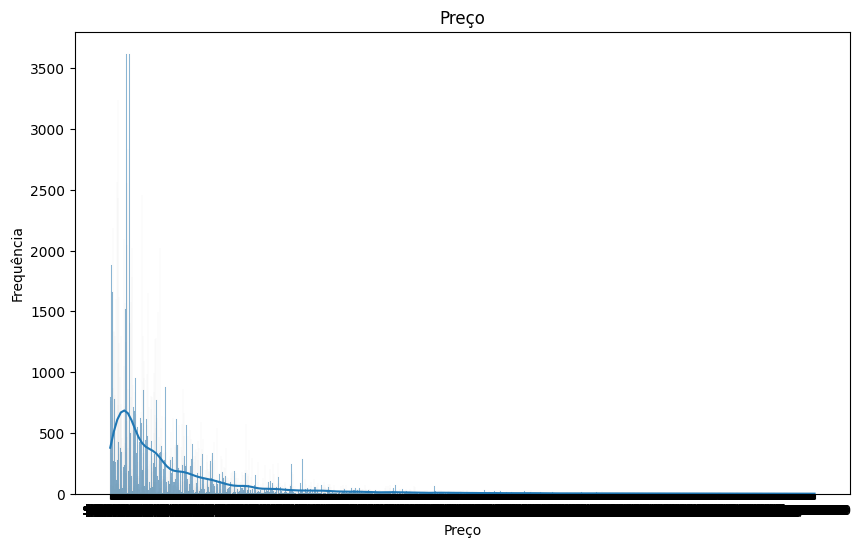

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(train_data_encoded['price'], bins=50, kde=True)
plt.title('Preço')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

In [22]:
train_data_encoded.head()

,id,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,...,property_type_Resort,property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,amenities_count
6,12039211,2.0,2.0,1125.0,1125.0,2.0,1125.0,1.0,0.0,2.0,...,False,False,False,False,False,False,False,False,False,0
7,25165747,1.0,1.0,1125.0,1125.0,1.0,1125.0,1.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,0
8,19787006,2.0,2.0,89.0,89.0,2.0,89.0,0.0,7.0,0.0,...,False,False,False,False,False,False,False,False,False,0
9,26805395,3.0,3.0,1125.0,1125.0,3.0,1125.0,9.0,1.0,0.0,...,False,True,False,False,False,False,False,False,False,0
12,32862797,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,...,False,False,False,False,False,False,False,False,False,0


In [23]:
train_data_encoded.columns

Index(['id', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
       'number_of_reviews_ltm', 'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'host_is_superhost',
       'host_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'extra_people', 'minimum_nights',
       'number_of_reviews', 'instant_bookable', 'price',
       'cancellation_policy_flexible', 'cancellation_policy_moderate',
       'cancellation_policy_strict',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 'room_type_Entire home/apt',
       'room_type_Hotel room', 'room_type_Private room',
       'room_type_Shared room', 'property_type_Aparthotel',
  

In [24]:
for col in test_data_encoded.columns:
  print(f"{col}: {test_data_encoded[col].unique()}")

id: [   65546    66574    70526 ... 43422187 43429750 43443500]
minimum_minimum_nights: [   2.    4.    1.   15.   30.    5.    3.   10.    7.   14.   20.    6.
   25.   90.  300.    8.  180.   12.  365.   60.    9.  899.   78.   79.
   24.   45.   28.   11.   17.   16.  930.   21.   19.   22.   29.   13.
  184.   92.  360.  310.   33.  100.  200.  158.   65.   75.  120.  182.
   32.   18. 1000.  630.   34.   59.   31.  353.   26.   23.  170.  500.
  210.   50.   95.  135.  222.  364.  730.   91.   40.  366.  912.   55.
   27.]
maximum_minimum_nights: [   7.    4.    2.   30.    5.   15.    3.   10.    1.   14.   20.    6.
    9.   25.   90.  300.    8.  180.   12.  365.   60.  899.   78.   79.
   24.   45.   28.   11.   17.   16.  930.   21.   19.   22.   40.   29.
   13.  184.   92.  360.  310.   31.   33.  100.  200.  158.   65.   75.
  120.  182.   32.   18. 1000.  630.   34.   59.  353.   27.   26.   23.
  450.  170.  500.  210.   50.  150.  400.  550.   95.  135.  222.  364.
  73

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [26]:
train_data_encoded.shape

(220522, 73)

In [27]:
train_data_encoded['price']

6         $102.00
7         $171.00
8         $283.00
9         $180.00
12        $241.00
           ...   
588077     $78.00
588079    $500.00
588084    $131.00
588085    $201.00
588086    $100.00
Name: price, Length: 220522, dtype: object

In [28]:
def remove_dollar_and_convert(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).str.replace('$', '').str.replace(',', '').astype(float)
    return df

columns_with_dollar = ['extra_people']
train_data_encoded = remove_dollar_and_convert(train_data_encoded, columns_with_dollar)
test_data_encoded = remove_dollar_and_convert(test_data_encoded, columns_with_dollar)

In [29]:
train_data_encoded.replace({'t': 1, 'f': 0, True: 1, False: 0}, inplace=True)
test_data_encoded.replace({'t': 1, 'f': 0, True: 1, False: 0}, inplace=True)

X = train_data_encoded.drop(['price'], axis=1)
y = train_data_encoded['price']

# Dividir o conjunto de dados de treinamento em treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_505678/2300607805.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_encoded.replace({'t': 1, 'f': 0, True: 1, False: 0}, inplace=True)
/tmp/ipykernel_505678/2300607805.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_data_encoded.replace({'t': 1, 'f': 0, True: 1, False: 0}, inplace=True)


In [30]:
scaler = StandardScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_val_scaled = scaler.transform(X_val)

In [33]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [34]:
print(f'Número de componentes principais: {X_train_pca.shape[1]}')


Número de componentes principais: 55


In [35]:
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [36]:
best_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

In [37]:
y = y.astype(str).str.replace('$', '').str.replace(',', '').astype(float)

In [38]:
y_train = y_train.astype(str).str.replace('$', '').str.replace(',', '').astype(float)

In [39]:
best_model.fit(X_train_pca, y_train)

GradientBoostingRegressor(random_state=42)

In [40]:
test_data_encoded

,id,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,...,property_type_Other,property_type_Pension (South Korea),property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Treehouse,property_type_Vacation home,property_type_Villa,property_type_Yurt,amenities_count
46153,65546,2.0,7.0,89.0,89.0,2.2,89.0,6.0,5.0,2.0,...,0,0,1,0,0,0,0,0,0,0
46154,66574,4.0,4.0,60.0,60.0,4.0,60.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
46155,70526,2.0,2.0,8.0,8.0,2.0,8.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
46156,72999,2.0,2.0,120.0,120.0,2.0,120.0,1.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
46158,76961,1.0,30.0,365.0,365.0,15.7,365.0,6.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196002,43301359,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
196006,43341407,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
196015,43422187,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
196019,43429750,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
missing_cols = set(X_train.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0

test_data_encoded = test_data_encoded[X_train.columns]

In [42]:
test_data_scaled = scaler.transform(test_data_encoded)

In [43]:
test_data_encoded.fillna(0, inplace=True)

In [44]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [45]:
test_data_scaled = scaler.transform(test_data_encoded)


In [46]:
test_data_pca = pca.transform(test_data_scaled)


In [47]:
test_predictions = best_model.predict(test_data_pca)

In [48]:
if len(test_predictions) < 196030:
    additional_rows_needed = 196030 - len(test_predictions)
    additional_predictions = [test_predictions.mean()] * additional_rows_needed
    test_predictions = np.concatenate([test_predictions, additional_predictions])

# Gerar o arquivo de submissão
submission = pd.DataFrame({
    'ID': range(196030),
    'price': test_predictions[:196030]
})

submission.to_csv('submission.csv', index=False)
print(f"Submissão gerada com {len(submission)} linhas.")

Submissão gerada com 196030 linhas.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import ast

models = {
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression()
}


'''
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Ridge': Ridge(alpha=1.0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1)
}
'''

def train_and_evaluate(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    return mse, r2, mae

results = {}
for name, model in models.items():
    mse, r2, mae = train_and_evaluate(model, X_train_pca, X_val_pca, y_train, y_val)
    results[name] = (mse, r2, mae)
    print(f'{name} - MSE: {mse}, R²: {r2}, MAE: {mae}')

# Selecionar o melhor modelo (com base no menor MSE, por exemplo)
best_model_name = min(results, key=lambda x: results[x][0])
best_model = models[best_model_name]
best_model.fit(X_train_pca, y_train)

# Preparar o conjunto de teste
missing_cols = set(X_train.columns) - set(test_data_encoded.columns)
for col in missing_cols:
    test_data_encoded[col] = 0

test_data_encoded = test_data_encoded[X_train.columns]
test_data_encoded.fillna(0, inplace=True)

test_data_scaled = scaler.transform(test_data_encoded)
test_data_pca = pca.transform(test_data_scaled)

# Prever os preços para o conjunto de teste
test_predictions = best_model.predict(test_data_pca)

# Garantir que a submissão tenha exatamente 196030 linhas
if len(test_predictions) < 196030:
    additional_rows_needed = 196030 - len(test_predictions)
    additional_predictions = [test_predictions.mean()] * additional_rows_needed
    test_predictions = np.concatenate([test_predictions, additional_predictions])

# Gerar o arquivo de submissão
submission = pd.DataFrame({
    'id': range(196030),
    'price': test_predictions[:196030]
})

submission.to_csv('submission.csv', index=False)
print(f"Submissão gerada com {len(submission)} linhas.")
print(f"Melhor modelo: {best_model_name}")

In [ ]:
print('oi')